In [1]:
# import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.model_selection import KFold, cross_val_score, RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

# Conceptual exercises

## Repeated cross-validation is a technique where $K$-fold cross-validation is repeated $N$ times, where for each $N$ the data sample is shuffled prior to each repetition. This ensures a different split of the sample. The end result is $K×N$ estimated models, with the overall estimated test error calculated as the average of each fold’s validation set error. How is this method distinguished from $K×N$-fold cross-validation? That is, why not simply partition the dataset into $K×N$-folds initially, then perform normal $K$-fold cross-validation?

### nes2008.csv contains a selection of variables from the 2008 American National Election Studies survey that allow you to test competing factors that may influence attitudes towards Joe Biden. Import the data file

In [2]:
nes = pd.read_csv("data/nes2008.csv")

In [3]:
nes.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


### Repeat the following process 100 times.

* (1) Fit a least squares regression model using the Biden data set (with biden as the response variable and all the other variables as predictors) using 100-fold cross-validation.
* (2) Estimate the test MSE

In [4]:
x = nes.iloc[:,1:]; y = nes['biden']

mse_1 = []
for i in range(100):
    reg = LinearRegression()
    kfold = KFold(100, shuffle = True, random_state = i)
    mse = -np.mean(cross_val_score(reg, x, y, cv=kfold, scoring='neg_mean_squared_error'))
    mse_1.append(mse)

### Calculate the mean and standard deviation of the 100 estimated test MSEs from 100-fold cross-validation. Graphically present the distribution of these values.

In [5]:
print("The mean of the 100 estimated MSEs is {:.2f}".format(np.mean(mse_1)))

The mean of the 100 estimated MSEs is 397.95


In [6]:
print("The standard deviation of the 100 estimated MSEs is {:.2f}".format(np.std(mse_1)))

The standard deviation of the 100 estimated MSEs is 0.26


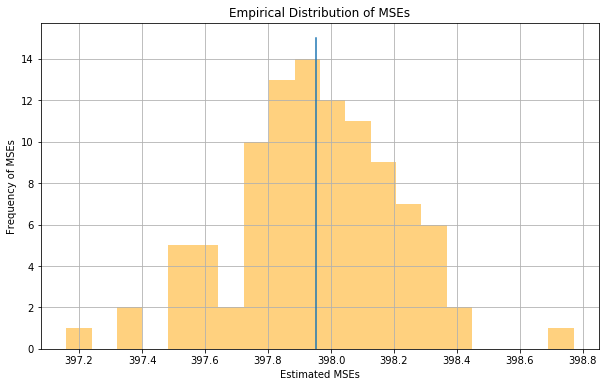

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.hist(mse_1, bins = 20, color = "orange", alpha = 0.5)
mean = np.mean(mse_1)
ax.plot([mean, mean, mean], [0, 8, 15])
ax.set_xlabel("Estimated MSEs"); ax.set_ylabel("Frequency of MSEs")
ax.set_title("Empirical Distribution of MSEs")
ax.grid(True)
plt.show()

### Repeat the following process 100 times.

* (1) Fit a least squares regression model of the form $Y=X$ using 10-fold cross-validation, repeated 10 times.
* (2) Estimate the test MSE

In [8]:
mse_2 = []
for i in range(100):
    reg = LinearRegression()
    kfold = RepeatedKFold(n_splits=10, n_repeats=10, random_state=i)
    mse = -np.mean(cross_val_score(reg, x, y, cv=kfold, scoring='neg_mean_squared_error'))
    mse_2.append(mse)

### Calculate the mean and standard deviation of the 100 estimated test MSEs from 10-fold cross-validation, repeated 10 times. Graphically present the distribution of these values.

In [9]:
print("The mean of the 100 estimated MSEs is {:.2f}".format(np.mean(mse_2)))

The mean of the 100 estimated MSEs is 398.11


In [10]:
print("The standard deviation of the 100 estimated MSEs is {:.2f}".format(np.std(mse_2)))

The standard deviation of the 100 estimated MSEs is 0.16


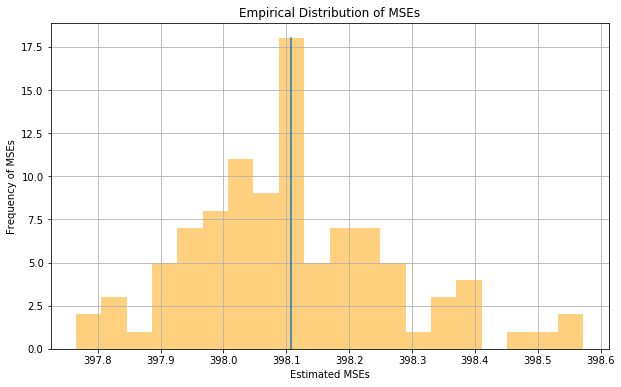

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.hist(mse_2, bins = 20, color = "orange", alpha = 0.5)
mean = np.mean(mse_2)
ax.plot([mean, mean, mean], [0, 8, 18])
ax.set_xlabel("Estimated MSEs"); ax.set_ylabel("Frequency of MSEs")
ax.set_title("Empirical Distribution of MSEs")
ax.grid(True)
plt.show()

### Distinguish the two procedures from one another and explain any differences.

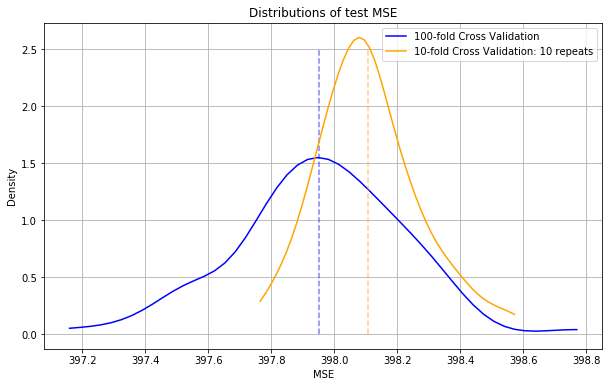

In [12]:
plt.figure(figsize=(10,6))
density_1 = stats.gaussian_kde(mse_1); 
x_1 = np.linspace(min(mse_1), max(mse_1), 50); 
plt.plot(x_1, density_1(x_1), label = "100-fold Cross Validation", color = 'b'); 
plt.plot([np.mean(mse_1), np.mean(mse_1)], [0, 2.5], color = 'b', linestyle = 'dashed', alpha = 0.5)
density_2 = stats.gaussian_kde(mse_2)
x_2 = np.linspace(min(mse_2), max(mse_2), 50)
plt.plot(x_2, density_2(x_2), label = "10-fold Cross Validation: 10 repeats", color = 'orange')
plt.plot([np.mean(mse_2), np.mean(mse_2)], [0, 2.5], color = 'orange', linestyle = 'dashed', alpha = 0.5)
plt.xlabel("MSE"); plt.ylabel("Density")
plt.title("Distributions of test MSE")
plt.legend(); plt.grid()
plt.show()

As we can see from the graph above, the distribution mean of both the 100-fold cross-validation and the 10-fold-10-repeat cross-validation are quite close, which implies that both distributions may converge to the same mean. However, it is apparent that the distribution generated from the 100-fold cross validation has a larger variance than the other.

# Application exercises

## Biden redux

### Estimate the MSE of the model using the traditional approach. That is, fit the linear regression model using the entire dataset and calculate the mean squared error for the entire dataset.

In [13]:
reg = LinearRegression().fit(nes.iloc[:,1:], nes['biden'])

In [14]:
mse = ((reg.predict(nes.iloc[:,1:]) - nes['biden'])**2).mean()

In [15]:
print("The MSE of a regression on the entire dataset is {:.2f}".format(mse))

The MSE of a regression on the entire dataset is 395.27


### Estimate the test MSE of the model using the validation set approach.

* Split the sample set into a training set (70%) and a validation set (30%). Be sure to set your seed prior to this part of your code to guarantee reproducibility of results.
* Fit the linear regression model using only the training observations.
* Calculate the MSE using only the test set observations.
* How does this value compare to the training MSE from step 1?

In [16]:
x_train, x_test, y_train, y_test = train_test_split(
    nes.iloc[:,1:], nes['biden'], test_size = 0.3, random_state = 1234)
reg_1 = LinearRegression().fit(x_train, y_train)
mse_test = ((reg_1.predict(x_test) - y_test)**2).mean()

In [17]:
print("The MSE of a regression on the entire dataset is {:.2f}".format(mse_test))

The MSE of a regression on the entire dataset is 395.17


The mse computed from this cross validation is slightly less than the one from step 1.

### Repeat the validation set approach 1000 times, using 1000 different splits of the observations into a training set and a validation set. Comment on the results obtained.

In [18]:
mses_test = []
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(
        nes.iloc[:,1:], nes['biden'], test_size = 0.3, random_state = i)
    reg_1 = LinearRegression().fit(x_train, y_train)
    mse_test = ((reg_1.predict(x_test) - y_test)**2).mean()
    mses_test.append(mse_test)

In [19]:
print("The mean of the 1000 estimated MSEs is {:.2f}".format(np.mean(mses_test)))

The mean of the 1000 estimated MSEs is 398.24


In [20]:
print("The standard deviation of the 1000 estimated MSEs is {:.2f}".format(np.std(mses_test)))

The standard deviation of the 1000 estimated MSEs is 22.16


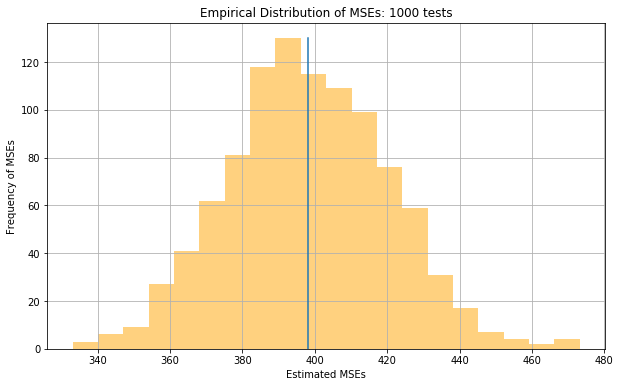

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.hist(mses_test, bins = 20, color = "orange", alpha = 0.5)
mean = np.mean(mses_test)
ax.plot([mean, mean, mean], [0, 8, 130])
ax.set_xlabel("Estimated MSEs"); ax.set_ylabel("Frequency of MSEs")
ax.set_title("Empirical Distribution of MSEs: 1000 tests")
ax.grid(True)
plt.show()

The variance of this empirical distribution is relatively large, and the result of the estimated MSE is very much depending on how the dataset is split into training and testing sets.

### Estimate the test MSE of the model using the leave-one-out cross-validation (LOOCV) approach. Comment on the results obtained.

In [22]:
mses_test_2 = []
X = nes.iloc[:,1:]; Y = nes['biden']
idx = np.arange(nes.shape[0])
for i in range(nes.shape[0]):
    x_train = X[idx != i]; y_train = Y[idx != i]
    x_test = X[idx == i]; y_test = Y[idx == i]
    reg_2 = LinearRegression().fit(x_train, y_train)
    mse = ((reg.predict(x_test) - y_test)**2).mean()
    mses_test_2.append(mse)

In [23]:
print("The mean of the all the LOOCV estimated MSEs is {:.2f}".format(np.mean(mses_test_2)))

The mean of the all the LOOCV estimated MSEs is 395.27


In [24]:
print("The standard deviation of the all the LOOCV estimated MSEs is {:.2f}".format(np.std(mses_test_2)))

The standard deviation of the all the LOOCV estimated MSEs is 620.72


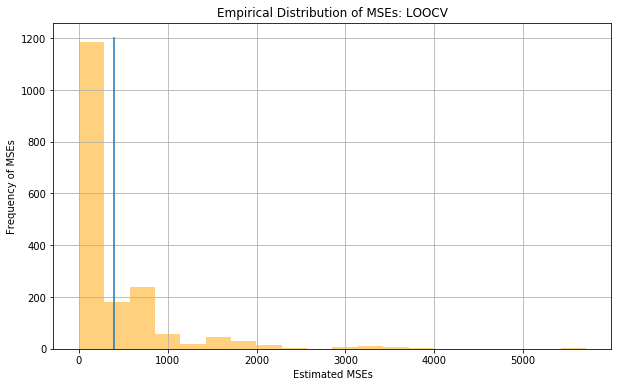

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.hist(mses_test_2, bins = 20, color = "orange", alpha = 0.5)
mean = np.mean(mses_test_2)
ax.plot([mean, mean, mean], [0, 8, 1200])
ax.set_xlabel("Estimated MSEs"); ax.set_ylabel("Frequency of MSEs")
ax.set_title("Empirical Distribution of MSEs: LOOCV")
ax.grid(True)
plt.show()

The results indicate that the variance of the estimated MSEs is huge. But they still have an unbiased mean, which is quite close to our results of the previous 1000-repeat test.

### Estimate the test MSE of the model using the 10-fold cross-validation approach. Comment on the results obtained.

In [26]:
mses_test_3 = []
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(
        X, Y, test_size = 0.1, random_state = i)
    reg_3 = LinearRegression().fit(x_train, y_train)
    mse_test = ((reg_1.predict(x_test) - y_test)**2).mean()
    mses_test_3.append(mse_test)

In [27]:
print("The mean of the all the LOOCV estimated MSEs is {:.2f}".format(np.mean(mses_test_3)))

The mean of the all the LOOCV estimated MSEs is 398.35


In [28]:
print("The standard deviation of the all the LOOCV estimated MSEs is {:.2f}".format(np.std(mses_test_3)))

The standard deviation of the all the LOOCV estimated MSEs is 34.97


Compared to the LOOCV method, the 10-fold cross validation has produced a slightly bigger mean, but has much less variance in its estimation of MSE.

### Compare the estimated parameters and standard errors from the original model in step 1 (the model estimated using all of the available data) to parameters and standard errors estimated using the bootstrap $(B=1000)$.

In [29]:
# Since the sklearn LinearRegression does not report the standard error, we use the statamodel to do the regression again

x = sm.add_constant(X); y = Y
reg = sm.OLS(y, x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  biden   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 04 Feb 2019   Prob (F-statistic):          1.50e-126
Time:                        00:44:50   Log-Likelihood:                -7966.6
No. Observations:                1807   AIC:                         1.595e+04
Df Residuals:                    1801   BIC:                         1.598e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8113      3.124     18.823      0.000      52.683      64.939
female         4.1032      0.948      4.327      0.000       2.243       5.963
age            0.0483      0.028      1.708      0.088      -0.007       0.104
educ          -0.3453      0.195     -1.773      0.076      -0.727       0.037
dem           15.4243      1.068     14.442      0.000      13.330      17.519
rep          -15.8495      1.311    -12.086      0.000     -18.421     -13.278
==============================================================================
Omnibus:                       87.979   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.940
Skew:                          -0.533   Prob(JB):                     7.31e-23
Kurtosis:                       3.466   Cond. No.                         348.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Here we implement the bootstrap method
para = np.zeros(6); sd = np.zeros(6)
for i in range(1000):
    data = resample(nes, random_state = i)
    x = data.iloc[:,1:]; y = data['biden']
    reg = sm.OLS(y.values, sm.add_constant(x)).fit()
    para = para + reg.params; sd = sd + reg.bse

In [31]:
para/1000

const     58.766509
female     4.132534
age        0.047385
educ      -0.340512
dem       15.416426
rep      -15.854990
dtype: float64

In [32]:
sd/1000

const     3.125331
female    0.947269
age       0.028233
educ      0.194812
dem       1.066601
rep       1.310386
dtype: float64

Using the bootstraping method, we've derived the following coefficient estimates and their associated standard errors:

|   |**Coef** |**Std. Err**|
|---|---------|------------|
|**const**|58.77|3.13|
|**female**|4.13|0.95|
|**age**|0.05|0.03|
|**educ**|-0.34|0.19|
|**dem**|15.42|1.07|
|**rep**|-15.85|1.31|

From the comparison of OLS results, we can find that the estimates of both coefficients and standard errors are pretty close, which implies that the classical linear regression assumptions can work well to approximate the data in large samples 

## Modeling voter turnout

In [33]:
# import the data
mh_train = pd.read_csv("data/mh_train.csv")
mh_test = pd.read_csv("data/mh_test.csv")

In [34]:
mh_train.head()

,vote96,mhealth_sum,age,educ,black,female,married,inc10
0,1,0,60,12,0,0,0,4.8149
1,1,1,36,12,0,0,1,8.8273
2,0,6,29,13,0,0,0,10.6998
3,1,1,41,15,1,1,1,8.8273
4,1,2,48,20,0,0,1,8.8273


### Use 10-fold cross-validation to partition the training set into training and validation sets.

In [35]:
np.random.seed(30100)
idx = np.random.choice(10, size = mh_train.shape[0])
train = []; validate = []
for i in range(10):
    train.append(mh_train[idx!=i])
    validate.append(mh_train[idx==i])

### Fit the following statistical models using 10-fold cross-validation:
* Logistic regression
* Linear discriminant analysis
* Quadratic discriminant analysis
* Naive Bayes - you can use the default hyperparameter settings
* K-nearest neighbors with $K=1,2,…,10$ (that is, 10 separate models varying K) and Euclidean distance metrics

#### Logistic regression

In [36]:
pred_logit = []; score_logit = []; valid_logit = []
for i in range(10):
    x = sm.add_constant(train[i].iloc[:,1:]); y = train[i]['vote96']
    logit = LogisticRegression().fit(x,y)
    pred = logit.predict(sm.add_constant(validate[i].iloc[:,1:]))
    score = logit.decision_function(sm.add_constant(validate[i].iloc[:,1:]))
    pred_logit.append(pred); score_logit.append(score); valid_logit.append(validate[i]['vote96'])

#### Linear Discrimination Analysis

In [37]:
pred_lda = []; score_lda = []; valid_lda = []
for i in range(10):
    x = train[i].iloc[:,1:]; y = train[i]['vote96']
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True).fit(x,y)
    pred = lda.predict(validate[i].iloc[:,1:])
    score = lda.decision_function(validate[i].iloc[:,1:])
    pred_lda.append(pred); score_lda.append(score); valid_lda.append(validate[i]['vote96'])

#### Quadratic Discrimination Analysis

In [38]:
pred_qda = []; score_qda = []; valid_qda = []
for i in range(10):
    x = train[i].iloc[:,1:]; y = train[i]['vote96']
    qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(x,y)
    pred = qda.predict(validate[i].iloc[:,1:])
    score = qda.decision_function(validate[i].iloc[:,1:])
    pred_qda.append(pred); score_qda.append(score); valid_qda.append(validate[i]['vote96'])

#### Naive Bayes

In [39]:
pred_nb = []; score_nb = []; valid_nb = []
for i in range(10):
    x = train[i].iloc[:,1:]; y = train[i]['vote96']
    nb = GaussianNB().fit(x,y)
    pred = nb.predict(validate[i].iloc[:,1:])
    score = nb.predict_proba(validate[i].iloc[:,1:])[:,1]
    pred_nb.append(pred); score_nb.append(score); valid_nb.append(validate[i]['vote96'])

#### K-nearest neighbors with $K=1,2,…,10$

In [40]:
pred_knn = []; score_knn = []; valid_knn = []
for k in range(1,11):
    pred_k = []; score_k = []; valid_k = []
    for i in range(10):
        x = train[i].iloc[:,1:]; y = train[i]['vote96']
        knn = KNeighborsClassifier(n_neighbors=k).fit(x, y)
        pred = knn.predict(validate[i].iloc[:,1:])
        score = knn.predict_proba(validate[i].iloc[:,1:])[:,1]
        pred_k.append(pred); score_k.append(score); valid_k.append(validate[i]['vote96'])
    pred_knn.append(pred_k); score_knn.append(score_k); valid_knn.append(valid_k)

### Evaluate each model’s performance using the validation set. Select the best model based on the validation set performance and whatever metrics you feel are important (e.g. error rate, proportional reduction in error, ROC curve, area under the curve).

#### Error Rate

In [41]:
def cal_errorRate(pred, valid):
    s = 0
    for i in range(10):
        s += ((pred[i]!=valid[i])*1).sum()
    return s/mh_train.shape[0]

In [42]:
res = [pred_logit] + [pred_lda] + [pred_qda] + [pred_nb] + pred_knn
valids = [valid_logit] + [valid_lda] + [valid_qda] + [valid_nb] + valid_knn
error_rates = []
for i in range(len(res)):
    error_rates.append(cal_errorRate(res[i], valids[i]))
model_names = ['Logistic', 'LDA', 'QDA', 'Naive Bayes'] + ['KNN_'+str(i) for i in range(1,11)]

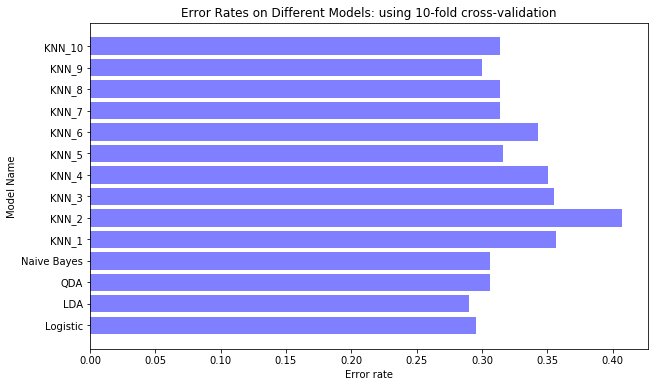

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.barh(range(len(model_names)), error_rates, color = 'b', alpha = 0.5)
ax.set_yticks(range(len(model_names)))
ax.set_yticklabels(model_names)
ax.set_xlabel('Error rate'); ax.set_ylabel('Model Name')
ax.set_title('Error Rates on Different Models: using 10-fold cross-validation')
plt.show()

Based on the error rate on the validation set, the best performed model is the **Linear Discriminant Analysis**, with an error rate of 29.04%

#### ROC & AUC

In [44]:
res = [score_logit] + [score_lda] + [score_qda] + [score_nb] + score_knn
scores = []
for r in res:
    score = []
    for e in r:
        score.extend(list(e))
    scores.append(score)
valids = []
for e in valid_logit:
    valids.extend(list(e))

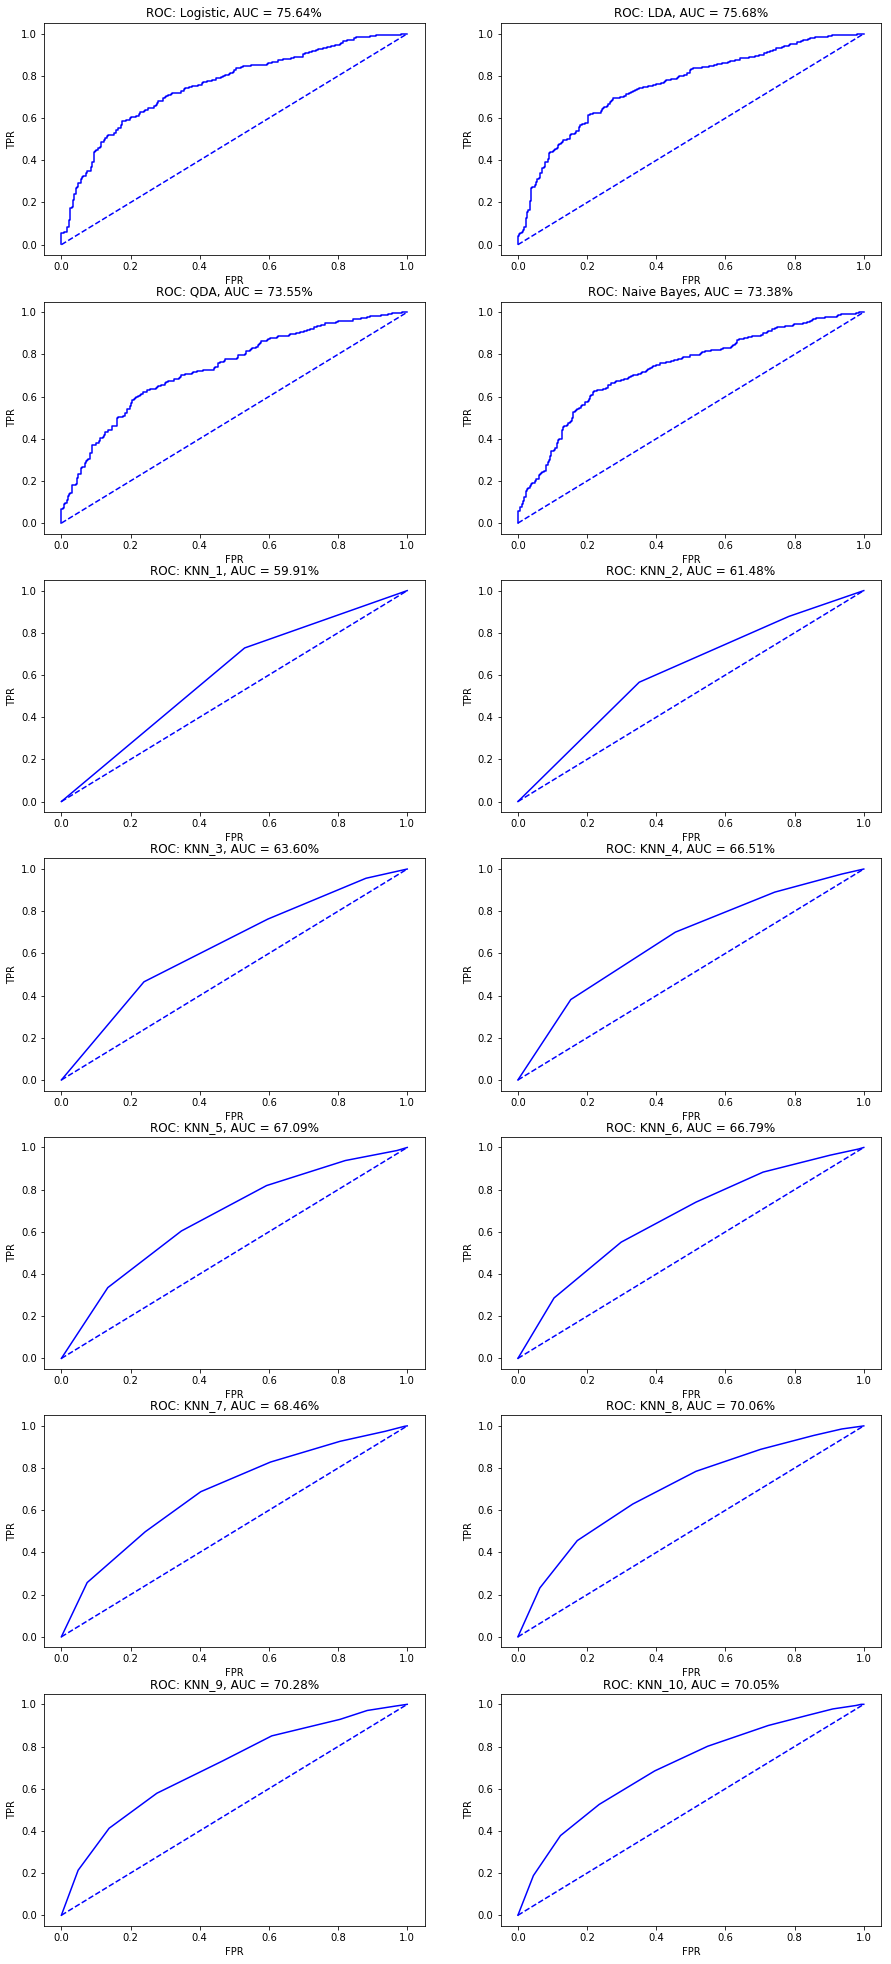

In [45]:
fig, axes = plt.subplots(7, 2)
fig.set_size_inches(15, 35)
idx = 0
for i in range(7):
    for j in range(2):
        ax = axes[i][j]
        fpr, tpr, _ = roc_curve(valids, scores[idx])
        ax.plot(fpr, tpr, color = 'b')
        ax.plot([0,1], [0,1], color = 'b', linestyle = 'dashed')
        ax.set_xlabel('FPR'); ax.set_ylabel('TPR')
        ax.set_title('ROC: {}, AUC = {:.2%}'.format(model_names[2*i+j], auc(fpr, tpr)))
        idx +=1
plt.show()

Based on these ROC and the corresponding AUCs, the best performed model on the validation set is again **Linear Discrimination Analysis**, with a AUC score of 75.68%.

### Once you select the best model, calculate your final estimate of the test error rate using the test set. To do this, take your best model and re-fit it using the entire training set (i.e. no cross-validation). Then calculate your performance metrics using the original test set.

In [46]:
# Let's proceed with the LDA model
x_train = mh_train.iloc[:,1:]; y_train = mh_train['vote96']
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True).fit(x,y)
x_test = mh_test.iloc[:,1:]; y_test = mh_test['vote96']
pred = lda.predict(x_test)
score = lda.decision_function(x_test)

In [47]:
res = ((pred != y_test)*1).sum()/x_test.shape[0]
print("The error rate on the original test set is {:.2%}".format(res))

The error rate on the original test set is 28.37%


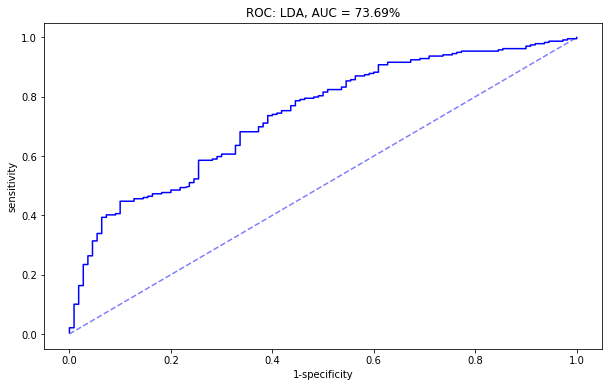

In [48]:
fpr, tpr, _ = roc_curve(y_test, score)

plt.figure(figsize = (10,6))
plt.plot(fpr, tpr, color = 'b')
plt.plot([0,1],[0,1], color = 'b', linestyle = 'dashed', alpha = 0.5)
plt.xlabel('1-specificity'); plt.ylabel('sensitivity')
plt.title('ROC: LDA, AUC = {:.2%}'.format(auc(fpr, tpr)))
plt.show()